In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Evaluation of Test Results from Model Training
Output ``.csv`` files contain all feature variables, the true temperature and a list of the predicted temperatures quantiles ``[5%, 50%, 95%]``. The output does not, however, contain the station names form which the features originate.

In [2]:
outputpath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Testing/2024-2-26_17.8_37.5178.csv'
outputfile = pd.read_csv(outputpath, delimiter=',')

In [3]:
outputfile['datetime'] = pd.to_datetime(outputfile['datetime'])

In [4]:
def make_lists(x):
    """ Comes in the form [val1 val2 val3] and must be converted to a list with floats"""
    vals = x.replace('[','').replace(']','')
    vals = ' '.join(vals.split())
    vals = vals.split(' ')

    return [float(val) for val in vals]

def extract_prediction(x: pd.DataFrame):
    """ Extracts the second value of the prediction list"""
    l = []
    for row in range(len(x)):
        l.append(x['pred'].iloc[row][1])
    return l
        

outputfile['pred'] = outputfile['Prediction'].apply(make_lists)
outputfile['pred'] = extract_prediction(outputfile)

In [73]:
outputfile.head()

,datetime,altitude,buildings,buildings_10,buildings_30,buildings_100,buildings_200,buildings_500,forests,forests_10,...,urbangreen_30,urbangreen_100,urbangreen_200,urbangreen_500,humidity,irradiation,moving_average,Prediction,True Temperature,pred
0,2019-06-24 08:10:00,442.469910,0.0,0.00000,1.805301e-07,1.754195e-08,4.429233e-09,7.129272e-10,0.0,0.000000,...,0.017500,0.001649,0.000416,6.700137e-05,87.78,294.781959,17.932857,[16.74 17.95 20.22],18.70,17.95
1,2019-10-18 23:15:00,473.661194,0.0,0.00000,0.000000e+00,0.000000e+00,2.161372e-296,3.478934e-297,0.0,0.113084,...,0.042420,0.003996,0.001009,1.624119e-04,90.04,0.000000,12.542857,[11.95 12.47 15.11],12.27,12.47
2,2019-08-14 22:10:00,408.002869,0.0,0.00125,1.084490e-03,1.021671e-04,2.579655e-05,4.152200e-06,0.0,0.000000,...,0.010158,0.000957,0.000242,3.889041e-05,59.75,0.000000,18.604286,[17.64 18.42 20.88],18.03,18.42
3,2019-08-17 11:10:00,400.576904,0.0,0.00000,1.519637e-04,1.431708e-05,3.614973e-06,5.818642e-07,0.0,0.000000,...,0.000147,0.000014,0.000003,5.629462e-07,56.81,758.737010,22.415714,[21.01 22.68 26.83],22.68,22.68
4,2019-09-16 10:30:00,588.408081,0.0,0.00000,3.771924e-05,3.554034e-06,8.973713e-07,1.444405e-07,0.0,0.000000,...,0.012795,0.001205,0.000304,4.898791e-05,81.07,646.371133,18.460000,[16.98 18.63 21.71],19.28,18.63


Scatterplot of the predicted and true temperatures

[Text(0.5, 0, 'True Temperature [°C]'),
 Text(0, 0.5, 'Predicted Temperature [°C]'),
 Text(0.5, 1.0, 'True vs Predicted Temperatures')]

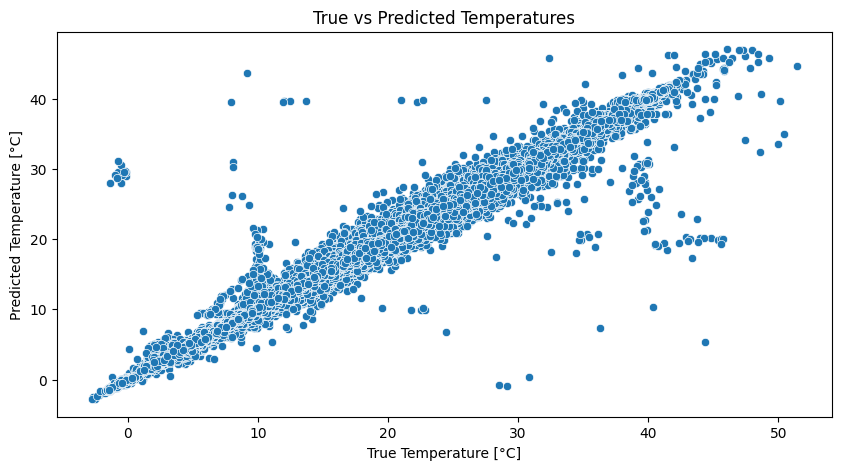

In [76]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='True Temperature', y='pred')
ax.set(xlabel='True Temperature [°C]', ylabel='Predicted Temperature [°C]', title='True vs Predicted Temperatures')

Error by time

In [5]:
outputfile['Error'] = outputfile['True Temperature'] - outputfile['pred']

In [6]:
outputfile.head()

,datetime,altitude,buildings,buildings_10,buildings_30,buildings_100,buildings_200,buildings_500,forests,forests_10,...,urbangreen_100,urbangreen_200,urbangreen_500,humidity,irradiation,moving_average,Prediction,True Temperature,pred,Error
0,2019-06-24 08:10:00,442.469910,0.0,0.00000,1.805301e-07,1.754195e-08,4.429233e-09,7.129272e-10,0.0,0.000000,...,0.001649,0.000416,6.700137e-05,87.78,294.781959,17.932857,[16.74 17.95 20.22],18.70,17.95,0.75
1,2019-10-18 23:15:00,473.661194,0.0,0.00000,0.000000e+00,0.000000e+00,2.161372e-296,3.478934e-297,0.0,0.113084,...,0.003996,0.001009,1.624119e-04,90.04,0.000000,12.542857,[11.95 12.47 15.11],12.27,12.47,-0.20
2,2019-08-14 22:10:00,408.002869,0.0,0.00125,1.084490e-03,1.021671e-04,2.579655e-05,4.152200e-06,0.0,0.000000,...,0.000957,0.000242,3.889041e-05,59.75,0.000000,18.604286,[17.64 18.42 20.88],18.03,18.42,-0.39
3,2019-08-17 11:10:00,400.576904,0.0,0.00000,1.519637e-04,1.431708e-05,3.614973e-06,5.818642e-07,0.0,0.000000,...,0.000014,0.000003,5.629462e-07,56.81,758.737010,22.415714,[21.01 22.68 26.83],22.68,22.68,0.00
4,2019-09-16 10:30:00,588.408081,0.0,0.00000,3.771924e-05,3.554034e-06,8.973713e-07,1.444405e-07,0.0,0.000000,...,0.001205,0.000304,4.898791e-05,81.07,646.371133,18.460000,[16.98 18.63 21.71],19.28,18.63,0.65


(array([18048., 18078., 18109., 18140., 18170., 18201., 18231., 18262.,
        18293.]),
 [Text(18048.0, 0, '2019-06'),
  Text(18078.0, 0, '2019-07'),
  Text(18109.0, 0, '2019-08'),
  Text(18140.0, 0, '2019-09'),
  Text(18170.0, 0, '2019-10'),
  Text(18201.0, 0, '2019-11'),
  Text(18231.0, 0, '2019-12'),
  Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02')])

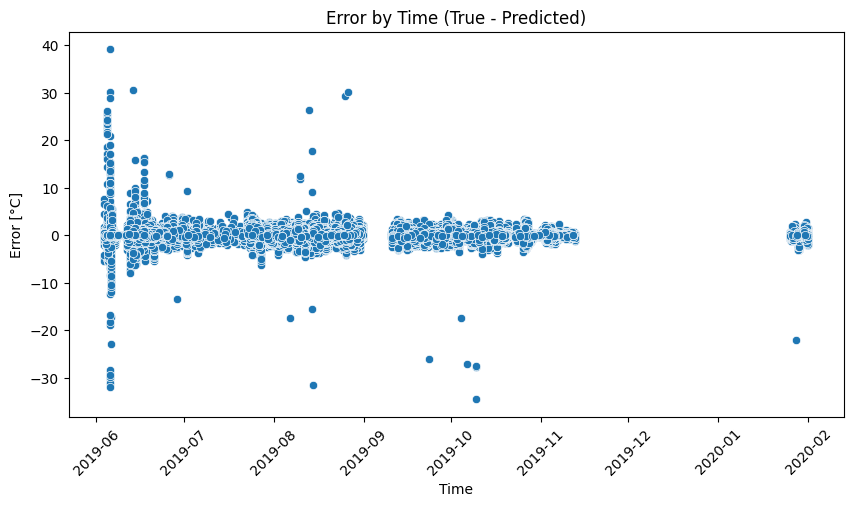

In [8]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Error')
ax.set(xlabel='Time', ylabel='Error [°C]', title='Error by Time (True - Predicted)')
plt.xticks(rotation=45)
